In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 92.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 73.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 55.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [2]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")

In [3]:
dataset_path1 = '/content/drive/MyDrive/CMP719/MOT17/MOT17-02-SDP/img1/'
dataset_path2 = '/content/drive/MyDrive/CMP719/MOT17/MOT17-04-FRCNN/img1/'
dataset_path3 = '/content/drive/MyDrive/CMP719/MOT17/MOT17-09-DPM/img1/'
dataset_path4 = '/content/drive/MyDrive/CMP719/MOT17/MOT17-10-SDP/img1/'

In [4]:
from ultralytics import YOLO
import time

start = time.time()
results = model.predict(
    source= dataset_path1,
    save=True,
    save_txt=True,
    conf=0.25,
    imgsz=640,
    classes=[0],
    tracker="bytetrack.yaml"
)
end = time.time()

inference_time = end - start



image 1/600 /content/drive/MyDrive/CMP719/MOT17/MOT17-02-SDP/img1/000001.jpg: 384x640 7 persons, 180.1ms
image 2/600 /content/drive/MyDrive/CMP719/MOT17/MOT17-02-SDP/img1/000002.jpg: 384x640 7 persons, 149.0ms
image 3/600 /content/drive/MyDrive/CMP719/MOT17/MOT17-02-SDP/img1/000003.jpg: 384x640 6 persons, 134.3ms
image 4/600 /content/drive/MyDrive/CMP719/MOT17/MOT17-02-SDP/img1/000004.jpg: 384x640 6 persons, 141.3ms
image 5/600 /content/drive/MyDrive/CMP719/MOT17/MOT17-02-SDP/img1/000005.jpg: 384x640 6 persons, 148.0ms
image 6/600 /content/drive/MyDrive/CMP719/MOT17/MOT17-02-SDP/img1/000006.jpg: 384x640 8 persons, 140.8ms
image 7/600 /content/drive/MyDrive/CMP719/MOT17/MOT17-02-SDP/img1/000007.jpg: 384x640 11 persons, 310.8ms
image 8/600 /content/drive/MyDrive/CMP719/MOT17/MOT17-02-SDP/img1/000008.jpg: 384x640 11 persons, 141.9ms
image 9/600 /content/drive/MyDrive/CMP719/MOT17/MOT17-02-SDP/img1/000009.jpg: 384x640 12 persons, 149.1ms
image 10/600 /content/drive/MyDrive/CMP719/MOT17/MO

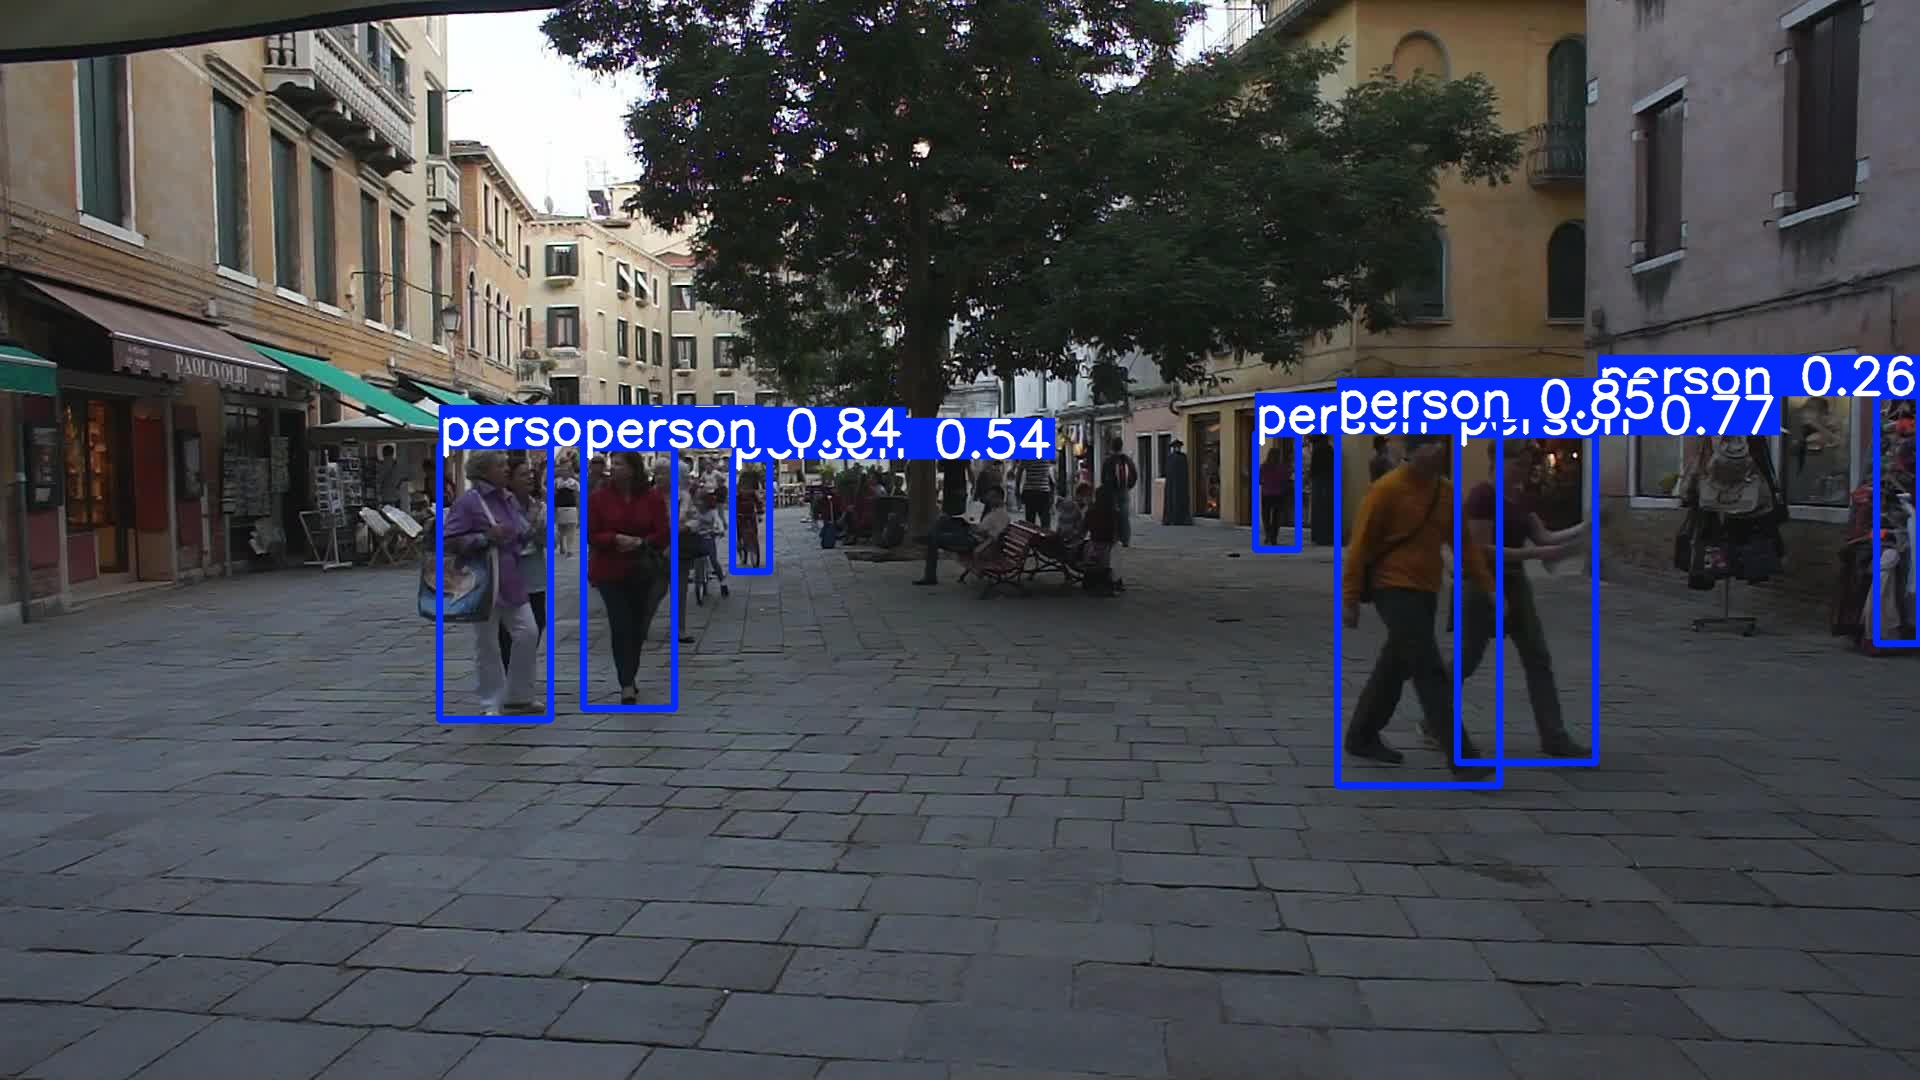

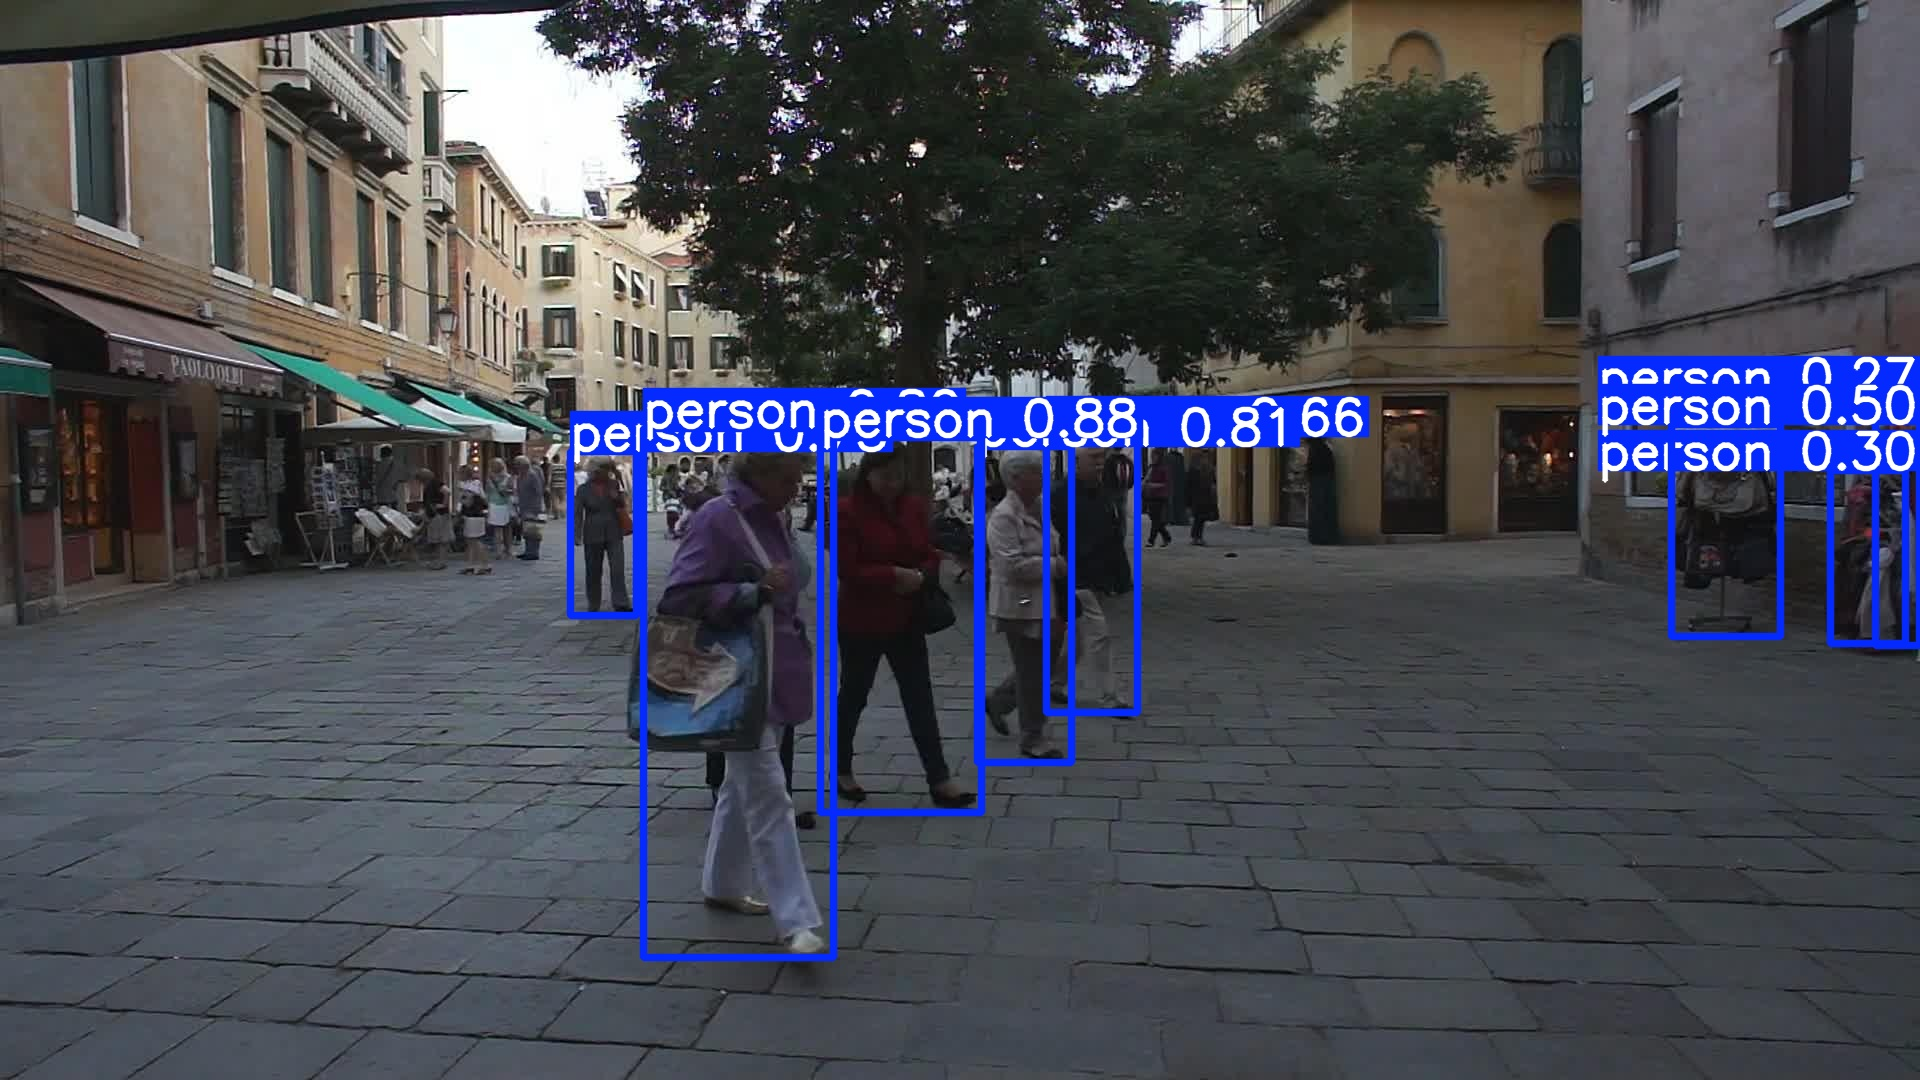

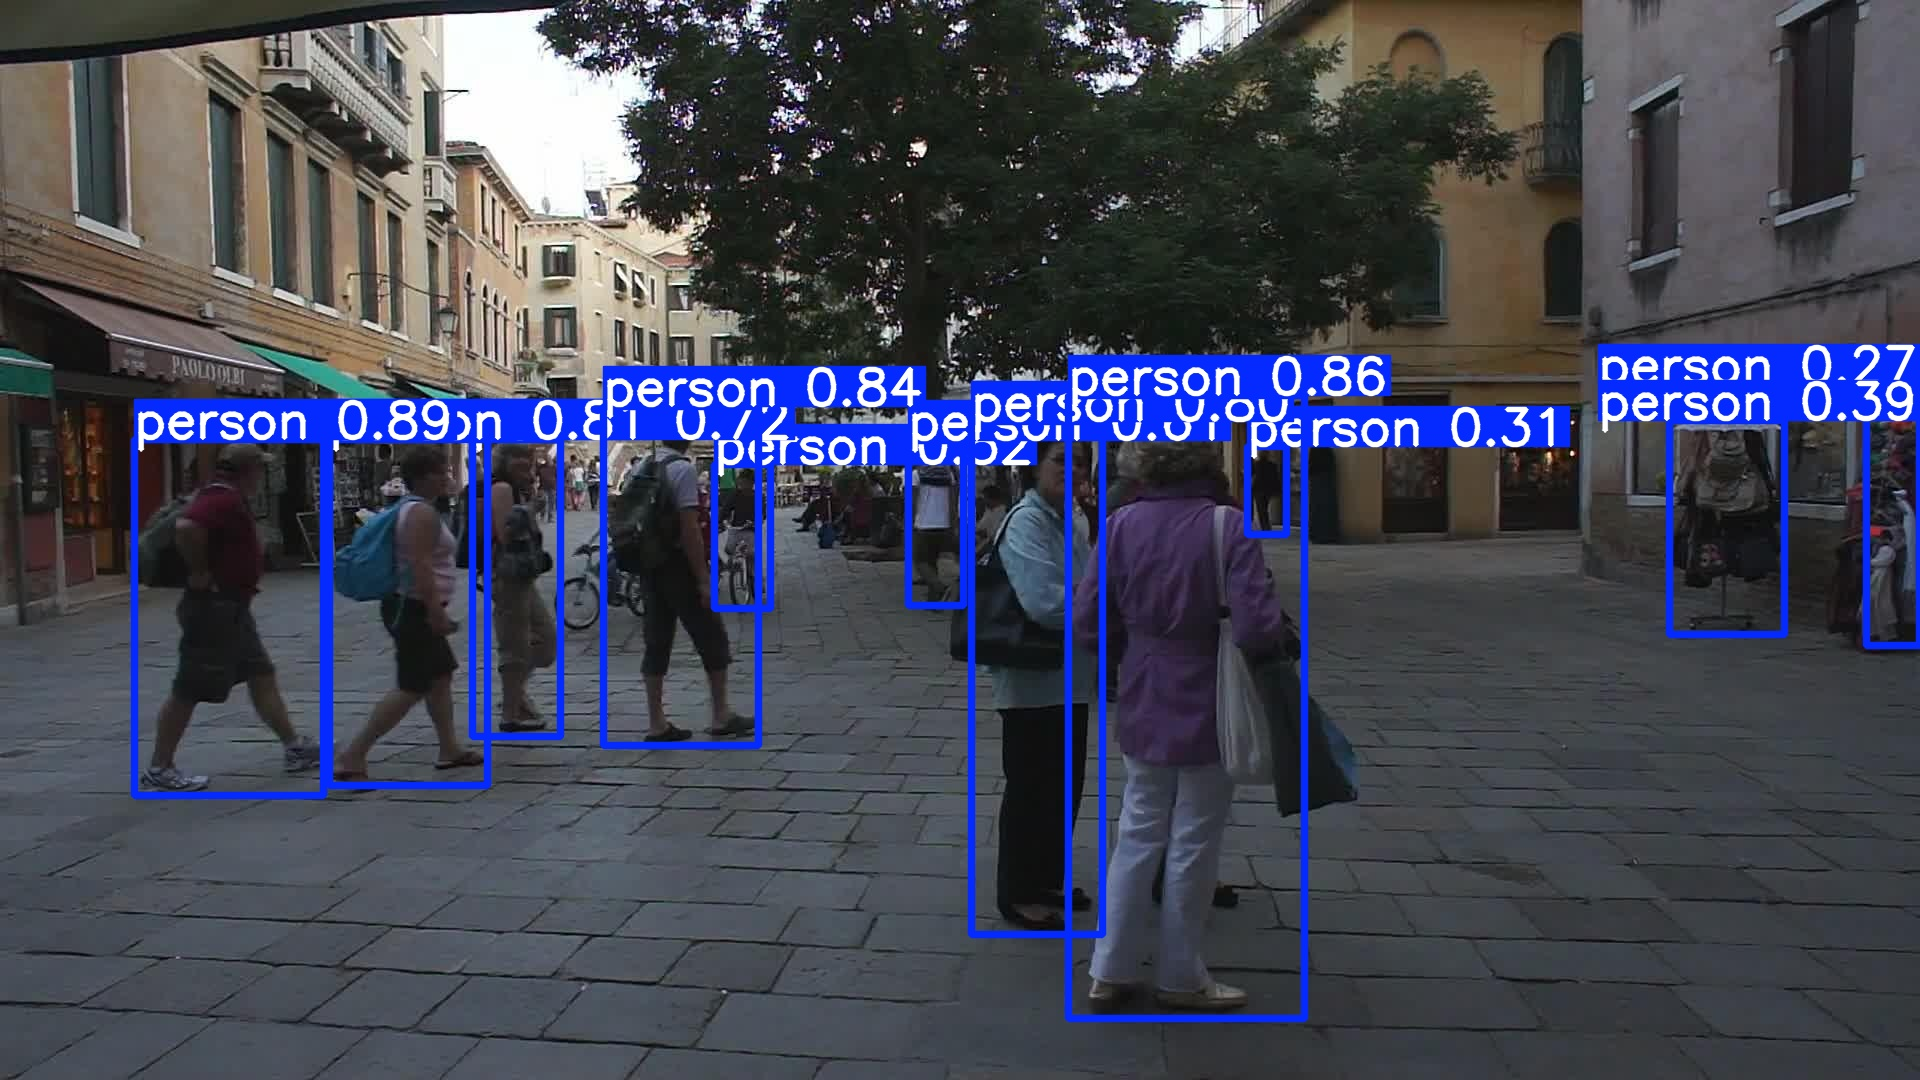

In [5]:
import os
from IPython.display import Image, display

output_dir = "runs/detect/predict"

img_files = sorted([f for f in os.listdir(output_dir) if f.endswith(".jpg")])

for i in range(0, len(img_files), 200):
    img_path = os.path.join(output_dir, img_files[i])
    display(Image(filename=img_path))

In [6]:
import os
from glob import glob

yolo_folder = "runs/detect/predict/labels"
output_file = "yolo_detections_mot_format.txt"
image_width = 1920
image_height = 1080

with open(output_file, 'w') as out_f:
    txt_files = sorted(glob(os.path.join(yolo_folder, "*.txt")))
    for i, file_path in enumerate(txt_files, start=1):  # 1-based frame index
        with open(file_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) == 5:
                    cls, cx, cy, w, h = map(float, parts)
                    conf = 1.0  # if confidence not saved
                else:
                    cls, cx, cy, w, h, conf = map(float, parts)

                if int(cls) != 0:
                    continue  # only class 0 (person)

                x = (cx - w / 2) * image_width
                y = (cy - h / 2) * image_height
                w *= image_width
                h *= image_height

                out_f.write(f"{i},-1,{x:.2f},{y:.2f},{w:.2f},{h:.2f},{conf:.4f},-1,-1,-1\n")


In [7]:
!pip install motmetrics


In [8]:
import motmetrics as mm
import pandas as pd
import os
import shutil


gt_path = "/content/drive/MyDrive/CMP719/MOT17/MOT17-02-SDP/gt/gt.txt"
det_path = "yolo_detections_mot_format.txt"

gt = pd.read_csv(gt_path, header=None)
print("GT DataFrame columns:", gt.columns)
gt.columns = ['FrameId', 'Id', 'X', 'Y', 'Width', 'Height', 'Confidence', 'ClassId', 'Visibility']

det = pd.read_csv(det_path, header=None)
print("Det DataFrame columns:", det.columns)
det.columns = ['FrameId', 'Id', 'X', 'Y', 'Width', 'Height', 'Confidence', 'ClassId', 'Visibility', 'ExtraColumn']

gt = gt[gt['ClassId'] == 1]



GT DataFrame columns: Index([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')
Det DataFrame columns: Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')


In [9]:
!pip install numpy==1.24.4 --force-reinstall

  Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.4 which is incompatible.
xarray-einstats 0.9.0 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
pymc 5.23.0 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires numpy>

In [10]:
acc = mm.MOTAccumulator(auto_id=True)
frames = sorted(gt['FrameId'].unique())

for frame in frames:
    gt_frame = gt[gt['FrameId'] == frame]
    det_frame = det[det['FrameId'] == frame]

    gt_ids = gt_frame['Id'].values
    gt_boxes = gt_frame[['X', 'Y', 'Width', 'Height']].values

    det_ids = det_frame['Id'].values
    det_boxes = det_frame[['X', 'Y', 'Width', 'Height']].values

    # IoU distance matrix
    distances = mm.distances.iou_matrix(gt_boxes, det_boxes, max_iou=0.5)
    acc.update(gt_ids, det_ids, distances)

mh = mm.metrics.create()
summary = mh.compute(acc, metrics=[
    'mota', 'motp', 'num_false_positives', 'num_misses', 'num_switches'
], name='YOLOv8-Person')

print(summary)

                   mota      motp  num_false_positives  num_misses  \
YOLOv8-Person  0.146332  0.190032                 1598       14264   

               num_switches  
YOLOv8-Person             0  


In [11]:
num_frames = len(os.listdir("/content/drive/MyDrive/CMP719/MOT17/MOT17-02-SDP/img1"))
fps = num_frames / inference_time
print(f"\nFPS: {fps:.2f}")


FPS: 4.17


In [12]:
start = time.time()
results = model.predict(
    source= dataset_path2,
    save=True,
    save_txt=True,
    conf=0.25,
    imgsz=640,
    classes=[0],
    tracker="bytetrack.yaml"
)
end = time.time()

inference_time = end - start


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/1050 /content/drive/MyDrive/CMP719/MOT17/MOT17-04-FRCNN/img1/000001.jpg: 384x640 24 persons, 140.3ms
image 2/1050 /content/drive/MyDrive/CMP719/MOT17/MOT17-04-FRCNN/img1/000002.jpg: 384x640 24 persons, 146.5ms
image 3/1050 /content/drive/MyDrive/CMP719/MOT17/MOT17-04-FRCNN/img1/000003.jpg: 384x640 23 persons, 132.9ms
image 4/1050 /content/drive/MyDrive/CMP719/MOT17/MOT17-04-FRCNN/img1/000004.jpg: 384x640 23 persons, 135.2ms
image 5/1050 /conten

In [14]:
output_dir = "runs/detect/predict2"

img_files = sorted([f for f in os.listdir(output_dir) if f.endswith(".jpg")])

for i in range(0, len(img_files), 200):
    img_path = os.path.join(output_dir, img_files[i])
    display(Image(filename=img_path))

Output hidden; open in https://colab.research.google.com to view.

In [15]:
yolo_folder = "runs/detect/predict2/labels"
output_file = "yolo_detections_mot_format.txt"
image_width = 1920
image_height = 1080

with open(output_file, 'w') as out_f:
    txt_files = sorted(glob(os.path.join(yolo_folder, "*.txt")))
    for i, file_path in enumerate(txt_files, start=1):  # 1-based frame index
        with open(file_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) == 5:
                    cls, cx, cy, w, h = map(float, parts)
                    conf = 1.0  # if confidence not saved
                else:
                    cls, cx, cy, w, h, conf = map(float, parts)

                if int(cls) != 0:
                    continue  # only class 0 (person)

                x = (cx - w / 2) * image_width
                y = (cy - h / 2) * image_height
                w *= image_width
                h *= image_height

                out_f.write(f"{i},-1,{x:.2f},{y:.2f},{w:.2f},{h:.2f},{conf:.4f},-1,-1,-1\n")


gt_path = "/content/drive/MyDrive/CMP719/MOT17/MOT17-04-FRCNN/gt/gt.txt"
det_path = "yolo_detections_mot_format.txt"

gt = pd.read_csv(gt_path, header=None)
print("GT DataFrame columns:", gt.columns)
gt.columns = ['FrameId', 'Id', 'X', 'Y', 'Width', 'Height', 'Confidence', 'ClassId', 'Visibility']

det = pd.read_csv(det_path, header=None)
print("Det DataFrame columns:", det.columns)
det.columns = ['FrameId', 'Id', 'X', 'Y', 'Width', 'Height', 'Confidence', 'ClassId', 'Visibility', 'ExtraColumn']

gt = gt[gt['ClassId'] == 1]

acc = mm.MOTAccumulator(auto_id=True)
frames = sorted(gt['FrameId'].unique())

for frame in frames:
    gt_frame = gt[gt['FrameId'] == frame]
    det_frame = det[det['FrameId'] == frame]

    gt_ids = gt_frame['Id'].values
    gt_boxes = gt_frame[['X', 'Y', 'Width', 'Height']].values

    det_ids = det_frame['Id'].values
    det_boxes = det_frame[['X', 'Y', 'Width', 'Height']].values

    # IoU distance matrix
    distances = mm.distances.iou_matrix(gt_boxes, det_boxes, max_iou=0.5)
    acc.update(gt_ids, det_ids, distances)

mh = mm.metrics.create()
summary = mh.compute(acc, metrics=[
    'mota', 'motp', 'num_false_positives', 'num_misses', 'num_switches'
], name='YOLOv8-Person')

print(summary)


num_frames = len(os.listdir("/content/drive/MyDrive/CMP719/MOT17/MOT17-04-FRCNN/img1"))
fps = num_frames / inference_time
print(f"\nFPS: {fps:.2f}")



GT DataFrame columns: Index([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')
Det DataFrame columns: Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')
                   mota      motp  num_false_positives  num_misses  \
YOLOv8-Person  0.228189  0.182036                 8512       28193   

               num_switches  
YOLOv8-Person             0  

FPS: 2.74


In [17]:
start = time.time()
results = model.predict(
    source= dataset_path3,
    save=True,
    save_txt=True,
    conf=0.25,
    imgsz=640,
    classes=[0],
    tracker="bytetrack.yaml"
)
end = time.time()

inference_time = end - start


image 1/525 /content/drive/MyDrive/CMP719/MOT17/MOT17-09-DPM/img1/000001.jpg: 384x640 9 persons, 133.5ms
image 2/525 /content/drive/MyDrive/CMP719/MOT17/MOT17-09-DPM/img1/000002.jpg: 384x640 9 persons, 151.1ms
image 3/525 /content/drive/MyDrive/CMP719/MOT17/MOT17-09-DPM/img1/000003.jpg: 384x640 10 persons, 149.0ms
image 4/525 /content/drive/MyDrive/CMP719/MOT17/MOT17-09-DPM/img1/000004.jpg: 384x640 8 persons, 143.0ms
image 5/525 /content/drive/MyDrive/CMP719/MOT17/MOT17-09-DPM/img1/000005.jpg: 384x640 7 persons, 142.4ms
image 6/525 /content/drive/MyDrive/CMP719/MOT17/MOT17-09-DPM/img1/000006.jpg: 384x640 9 persons, 152.0ms
image 7/525 /content/drive/MyDrive/CMP719/MOT17/MOT17-09-DPM/img1/000007.jpg: 384x640 10 persons, 136.7ms
image 8/525 /content/drive/MyDrive/CMP719/MOT17/MOT17-09-DPM/img1/000008.jpg: 384x640 7 persons, 136.5ms
image 9/525 /content/drive/MyDrive/CMP719/MOT17/MOT17-09-DPM/img1/000009.jpg: 384x640 10 persons, 132.9ms
image 10/525 /content/drive/MyDrive/CMP719/MOT17/MO

In [20]:
output_dir = "runs/detect/predict2"

img_files = sorted([f for f in os.listdir(output_dir) if f.endswith(".jpg")])

for i in range(0, len(img_files), 200):
    img_path = os.path.join(output_dir, img_files[i])
    display(Image(filename=img_path))

Output hidden; open in https://colab.research.google.com to view.

In [21]:
yolo_folder = "runs/detect/predict2/labels"
output_file = "yolo_detections_mot_format.txt"
image_width = 1920
image_height = 1080

with open(output_file, 'w') as out_f:
    txt_files = sorted(glob(os.path.join(yolo_folder, "*.txt")))
    for i, file_path in enumerate(txt_files, start=1):  # 1-based frame index
        with open(file_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) == 5:
                    cls, cx, cy, w, h = map(float, parts)
                    conf = 1.0  # if confidence not saved
                else:
                    cls, cx, cy, w, h, conf = map(float, parts)

                if int(cls) != 0:
                    continue  # only class 0 (person)

                x = (cx - w / 2) * image_width
                y = (cy - h / 2) * image_height
                w *= image_width
                h *= image_height

                out_f.write(f"{i},-1,{x:.2f},{y:.2f},{w:.2f},{h:.2f},{conf:.4f},-1,-1,-1\n")


gt_path = "/content/drive/MyDrive/CMP719/MOT17/MOT17-09-DPM/gt/gt.txt"
det_path = "yolo_detections_mot_format.txt"

gt = pd.read_csv(gt_path, header=None)
print("GT DataFrame columns:", gt.columns)
gt.columns = ['FrameId', 'Id', 'X', 'Y', 'Width', 'Height', 'Confidence', 'ClassId', 'Visibility']

det = pd.read_csv(det_path, header=None)
print("Det DataFrame columns:", det.columns)
det.columns = ['FrameId', 'Id', 'X', 'Y', 'Width', 'Height', 'Confidence', 'ClassId', 'Visibility', 'ExtraColumn']

gt = gt[gt['ClassId'] == 1]

acc = mm.MOTAccumulator(auto_id=True)
frames = sorted(gt['FrameId'].unique())

for frame in frames:
    gt_frame = gt[gt['FrameId'] == frame]
    det_frame = det[det['FrameId'] == frame]

    gt_ids = gt_frame['Id'].values
    gt_boxes = gt_frame[['X', 'Y', 'Width', 'Height']].values

    det_ids = det_frame['Id'].values
    det_boxes = det_frame[['X', 'Y', 'Width', 'Height']].values

    # IoU distance matrix
    distances = mm.distances.iou_matrix(gt_boxes, det_boxes, max_iou=0.5)
    acc.update(gt_ids, det_ids, distances)

mh = mm.metrics.create()
summary = mh.compute(acc, metrics=[
    'mota', 'motp', 'num_false_positives', 'num_misses', 'num_switches'
], name='YOLOv8-Person')

print(summary)


num_frames = len(os.listdir("/content/drive/MyDrive/CMP719/MOT17/MOT17-09-DPM/img1"))
fps = num_frames / inference_time
print(f"\nFPS: {fps:.2f}")



GT DataFrame columns: Index([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')
Det DataFrame columns: Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')
                   mota      motp  num_false_positives  num_misses  \
YOLOv8-Person -2.695775  0.203944                18226        1454   

               num_switches  
YOLOv8-Person             0  

FPS: 3.73
